# Toy Experiment


## Data Set 1

Four simplistic time series observations.


## Data Set 2

Two clusters of time series at different level of mean.

## Data Set 3

Six series. Two parameters adjusting trials.


## Data Set 4

Three clusters of time series with noise. Expect the clustering algorithm to find three clusters and group similar time-series together.


In [1]:
from experiment.design import TimeSeriesClustering

In [2]:
expr1 = TimeSeriesClustering()
expr1

<TimeSeriesClustering summary="">

In [3]:
from data.generator import dgf_sine, dgf_lin_path, dgf_hpr_path, dgf_gbm_path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

,t,sin1,sin2,ret1,ret2
0,0.000000,112.727892,100.000000,100.0,109.989109
1,1.570796,112.591601,100.980564,100.0,109.978218
2,3.141593,112.430085,101.923045,100.0,109.967327
3,4.712389,112.244918,102.790840,100.0,109.956436
4,6.283185,112.037900,103.550247,100.0,109.945545
...,...,...,...,...,...
96,150.796447,107.337971,100.499588,100.0,108.943564
97,152.367244,107.487234,101.465543,100.0,108.932673
98,153.938040,107.660953,102.374581,100.0,108.921782
99,155.508836,107.857438,103.191396,100.0,108.910891


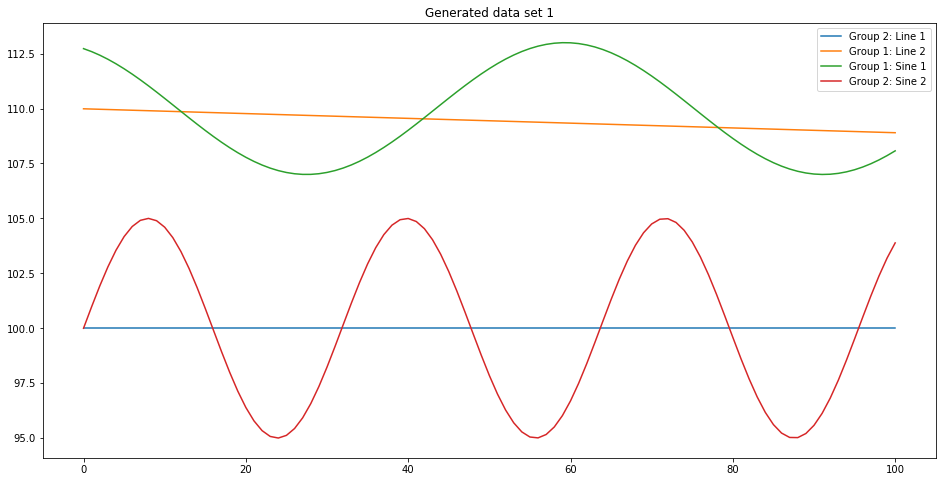

In [4]:
# Data Set 1

t = np.linspace(0, 50*np.pi, 101) # discrete time axis of 100 increments

sin1 = dgf_sine(t, A=3, f=1/100., Z=110.0, phi=2)
sin2 = dgf_sine(t, A=5, f=1/50., Z=100.0)
ret1 = dgf_hpr_path(t, 100, 0.0)
ret2 = dgf_hpr_path(t, 110, -0.01)

plt.figure(figsize=(16,8))
plt.plot(ret1, label='Group 2: Line 1')
plt.plot(ret2, label='Group 1: Line 2')
plt.plot(sin1, label='Group 1: Sine 1')
plt.plot(sin2, label='Group 2: Sine 2')

plt.legend()
plt.title('Generated data set 1')

data = {'t':t, 'sin1':sin1, 'sin2':sin2, 'ret1':ret1, 'ret2':ret2}
ds1 = pd.DataFrame(data)
ds1

Text(0.5, 1.0, 'Generated data set 2')

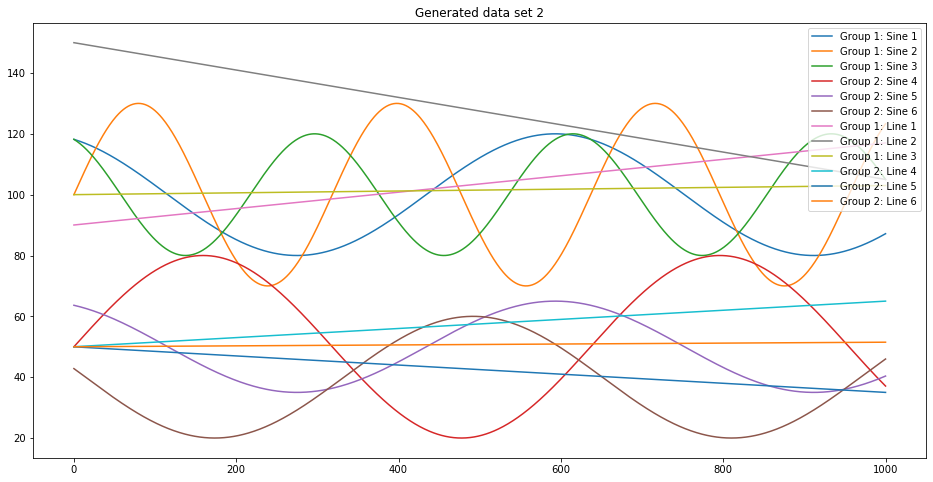

In [5]:
# Data Set 2

t = np.linspace(0, 50*np.pi, 1001) # discrete time axis of 1000 increments

sin1 = dgf_sine(t, A=20, f=1/100., Z=100.0, phi=2)
sin2 = dgf_sine(t, A=30, f=1/50., Z=100.0)
sin3 = dgf_sine(t, A=20, f=1/50., Z=100.0, phi=2)

sin4 = dgf_sine(t, A=30, Z=50.0)
sin5 = dgf_sine(t, A=15, Z=50.0, phi=2)
sin6 = dgf_sine(t, A=20, Z=40.0, phi=3)


ret1 = dgf_hpr_path(t, 90, 0.30)
ret2 = dgf_hpr_path(t, 150, -0.30)
ret3 = dgf_hpr_path(t, 100, 0.03)

ret4 = dgf_hpr_path(t, 50, 0.30)
ret5 = dgf_hpr_path(t, 50, -0.30)
ret6 = dgf_hpr_path(t, 50, 0.03)


plt.figure(figsize=(16,8))

plt.plot(sin1, label='Group 1: Sine 1')
plt.plot(sin2, label='Group 1: Sine 2')
plt.plot(sin3, label='Group 1: Sine 3')
plt.plot(sin4, label='Group 2: Sine 4')
plt.plot(sin5, label='Group 2: Sine 5')
plt.plot(sin6, label='Group 2: Sine 6')

plt.plot(ret1, label='Group 1: Line 1')
plt.plot(ret2, label='Group 1: Line 2')
plt.plot(ret3, label='Group 1: Line 3')
plt.plot(ret4, label='Group 2: Line 4')
plt.plot(ret5, label='Group 2: Line 5')
plt.plot(ret6, label='Group 2: Line 6')

data = {'t':t, 
        'sin1':sin1, 'sin2':sin2, 'sin3':sin3, 'sin4':sin4, 'sin5':sin5, 'sin6':sin6, 
        'ret1':ret1, 'ret2':ret2, 'ret3':ret3, 'ret4':ret4, 'ret5':ret5, 'ret6':ret6}
ds2 = pd.DataFrame(data)
ds2


plt.legend()
plt.title('Generated data set 2')

### Geometric Brownian Motion: concept check

GBM model is controlled by  S0, mu, sigma.

In [6]:
t.size

1001

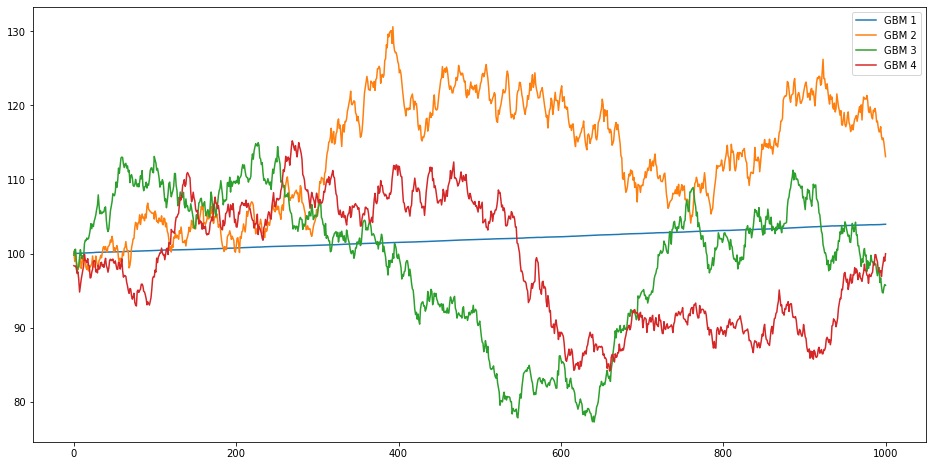

In [7]:
gbm1 = dgf_gbm_path(t, s0=100)
gbm2 = dgf_gbm_path(t, s0=100, sigma=2.0)
gbm3 = dgf_gbm_path(t, s0=100, sigma=2.0)
gbm4 = dgf_gbm_path(t, s0=100, sigma=2.0)

plt.figure(figsize=(16,8))
plt.plot(gbm1, label='GBM 1')
plt.plot(gbm2, label='GBM 2')
plt.plot(gbm3, label='GBM 3')
plt.plot(gbm4, label='GBM 4')
plt.legend()

This step we control varying between mu and sigma

Text(0.5, 1.0, 'Generated data set 3')

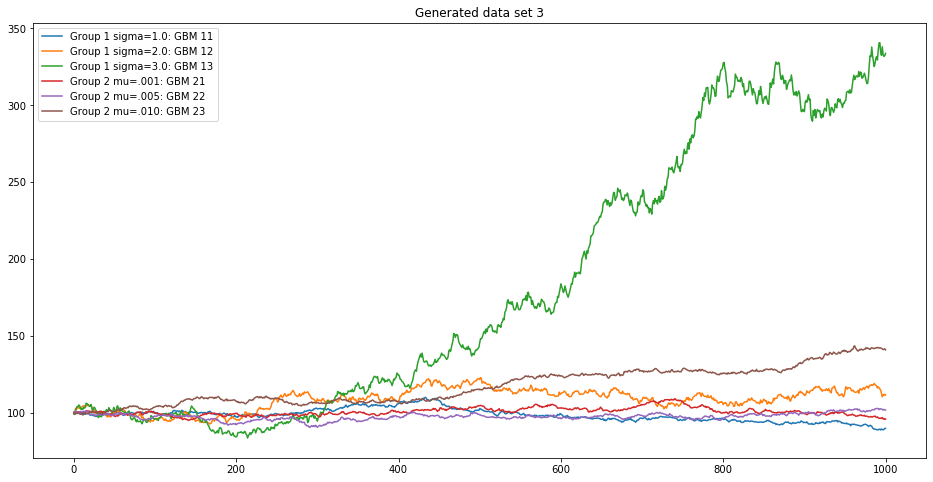

In [8]:
# Data Set 3

t = np.linspace(0, 50*np.pi, 1001) # discrete time axis of 1000 increments

# Group of stock
gbm11 = dgf_gbm_path(t, s0=100, sigma=1.0)
gbm12 = dgf_gbm_path(t, s0=100, sigma=2.0)
gbm13 = dgf_gbm_path(t, s0=100, sigma=3.0)

gbm21 = dgf_gbm_path(t, s0=100, mu=0.001, sigma=1.0)
gbm22 = dgf_gbm_path(t, s0=100, mu=0.005, sigma=1.0)
gbm23 = dgf_gbm_path(t, s0=100, mu=0.010, sigma=1.0)

plt.figure(figsize=(16,8))
plt.plot(gbm11, label='Group 1 sigma=1.0: GBM 11')
plt.plot(gbm12, label='Group 1 sigma=2.0: GBM 12')
plt.plot(gbm13, label='Group 1 sigma=3.0: GBM 13')
plt.plot(gbm21, label='Group 2 mu=.001: GBM 21')
plt.plot(gbm22, label='Group 2 mu=.005: GBM 22')
plt.plot(gbm23, label='Group 2 mu=.010: GBM 23')


data = {'t':t, 
        'gbm11':gbm11, 'gbm12':gbm12, 'gbm13':gbm13, 'gbm21':gbm21, 'gbm22':gbm22, 'gbm23':gbm23}
ds3 = pd.DataFrame(data)
ds3


plt.legend()
plt.title('Generated data set 3')

In the next exercise we generate data set with GBM generator and use clustering algorithm to recover the groups.

Expect to recover three groups from this simulated data / test case.

There are 12 series. First group are 6 stocks. Second group are 3 stocks. Third gorup are 3 stocks.

Text(0.5, 1.0, 'Generated data set 4')

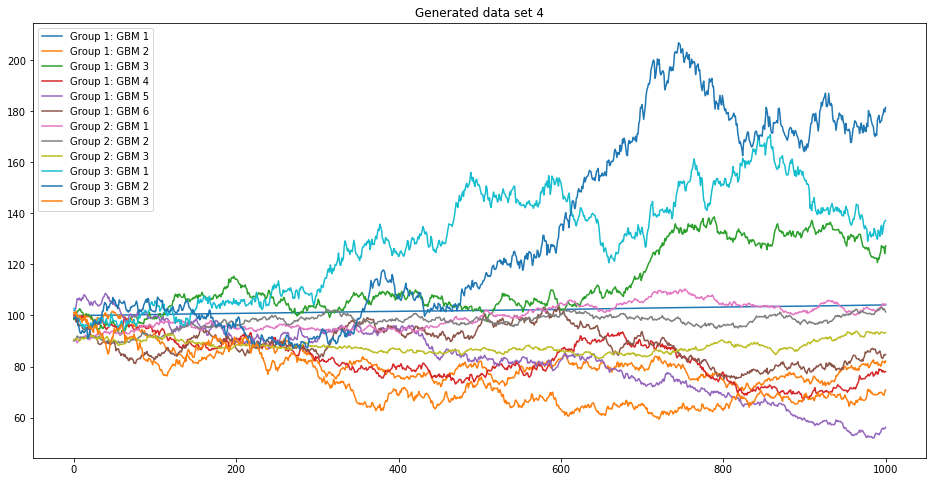

In [9]:
# Data Set 4

t = np.linspace(0, 50*np.pi, 1001) # discrete time axis of 1000 increments

# Group of stock
gbm11 = dgf_gbm_path(t, s0=100)
gbm12 = dgf_gbm_path(t, s0=100, sigma=2.0)
gbm13 = dgf_gbm_path(t, s0=100, sigma=2.0)
gbm14 = dgf_gbm_path(t, s0=100, sigma=2.0)
gbm15 = dgf_gbm_path(t, s0=100, sigma=2.0)
gbm16 = dgf_gbm_path(t, s0=100, sigma=2.0)

# Group of stock
gbm21 = dgf_gbm_path(t, s0=90, sigma=1.0)
gbm22 = dgf_gbm_path(t, s0=90, sigma=1.0)
gbm23 = dgf_gbm_path(t, s0=90, sigma=1.0)

# Group of stock
gbm31 = dgf_gbm_path(t, s0=100, mu=0.03, sigma=3.0)
gbm32 = dgf_gbm_path(t, s0=100, mu=0.03, sigma=3.0)
gbm33 = dgf_gbm_path(t, s0=100, mu=0.03, sigma=3.0)


data = {'t':t, 
        'gbm11':gbm11, 'gbm12':gbm12, 'gbm13':gbm13, 'gbm14':gbm14, 'gbm15':gbm15, 'gbm16':gbm16, 
        'gbm21':gbm21, 'gbm22':gbm22, 'gbm23':gbm23,
        'gbm31':gbm31, 'gbm32':gbm32, 'gbm33':gbm33}
ds4 = pd.DataFrame(data)
ds4


plt.figure(figsize=(16,8))
plt.plot(gbm11, label='Group 1: GBM 1')
plt.plot(gbm12, label='Group 1: GBM 2')
plt.plot(gbm13, label='Group 1: GBM 3')
plt.plot(gbm14, label='Group 1: GBM 4')
plt.plot(gbm15, label='Group 1: GBM 5')
plt.plot(gbm16, label='Group 1: GBM 6')

plt.plot(gbm21, label='Group 2: GBM 1')
plt.plot(gbm22, label='Group 2: GBM 2')
plt.plot(gbm23, label='Group 2: GBM 3')

plt.plot(gbm31, label='Group 3: GBM 1')
plt.plot(gbm32, label='Group 3: GBM 2')
plt.plot(gbm33, label='Group 3: GBM 3')


plt.legend()
plt.title('Generated data set 4')

# Dissimilarity Index

Create and evaluate distance metric for comparing the time series. For every time series pair, we need a measure to determine how similar they are to each other. We then measure this similarity value for every pair of time series in the data set.

Euclidean distance. Check that we compute Euclidean and arrive at the same values.

First try with the two linear lines, then make a function to compute distance for any data set in this experiment.

In [10]:
# Euclidean distance as norm

# Example
ts1 = ds1['ret1'].values
ts2 = ds1['ret2'].values  # np.array  (101,)

np.linalg.norm(ts1 - ts2)

94.97022514117958

In [11]:
from scipy.spatial.distance import euclidean

euclidean(ts1, ts2)

94.97022514117957

In [12]:
# Naive calculate. Difference each x observation from the two series and square each. 
# Then sum every element together and take square root.

tmp = ts1 - ts2
(tmp **2).sum()**0.5

94.97022514117958

In [13]:
from scipy.spatial.distance import correlation
    
def compute_daily_returns(ts):
    # daily return for Numpy array
    tmp = ts.copy()    
    tmp = np.roll(tmp,1) # np.roll(ts2.copy(), 1)
    ret = np.log(ts[1:]/tmp[1:]) # log-return
    return ret

compute_daily_returns(ts1)

def my_corr_dist(u,v):
    """adjust correlation distance measure between stock price time series.
       
       Computes the correlation distance between two 1-D arrays.
       https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.correlation.html
       
       First difference to get daily return before calculating the correlation.
    """
    r1 = compute_daily_returns(u)
    r2 = compute_daily_returns(v)
    return correlation(r1, r2)

my_corr_dist(ts1,ts2)

# https://numpy.org/doc/stable/reference/generated/numpy.correlate.html
# computes the correlation as generally defined in signal processing texts

# Pearson's
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html


# np.corrcoef(tmp[1:],ts2[1:])

/opt/conda/lib/python3.7/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


nan

Two dynamic time warping distance calculations.

1. plain

2. obtain daiy returns first then calculate

,base,distance_cityblock,distance_corr_returns,distance_correlation,distance_cosine,distance_dtw_returns,distance_dynamictimewarp,distance_euclidean,target
0,sin1,963.177640,0.803819,0.779771,0.000642,963.177640,0.539374,102.629101,sin2
1,sin1,974.469567,NaN,NaN,0.000185,974.469567,0.171166,99.247848,ret1
2,sin1,186.013093,1.128029,0.818311,0.000179,178.535584,0.169481,20.930049,ret2
3,sin2,315.378728,NaN,NaN,0.000605,315.378728,0.637599,35.028133,ret1
4,sin2,942.608073,1.092646,0.818660,0.000591,942.608073,0.638054,99.962495,ret2
5,ret1,953.900000,NaN,NaN,0.000004,953.900000,0.009951,94.970225,ret2


<Figure size 720x576 with 0 Axes>

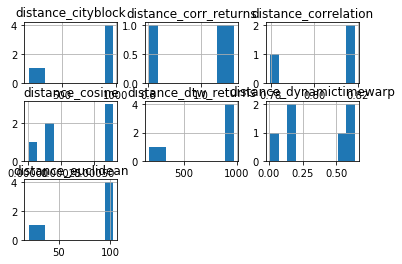

In [14]:
from itertools import combinations
from scipy.spatial.distance import  euclidean, correlation, cosine, euclidean, cityblock
from fastdtw import fastdtw


def my_dtw_dist(u, v):
    # use FastDTW (approximation of DTW) to measure dissimarity
    r1 = compute_daily_returns(u)
    r2 = compute_daily_returns(v)
    return fastdtw(r1,r2)[0]

def dtw_dist_ret(u, v):
    # use FastDTW (approximation of DTW) to measure dissimarity
    return fastdtw(u,v)[0]



def calc_distance_table_euclidean(ds):
    labels = list(ds.keys())
    labels.remove('t') # Remove the time (sampling point) axis
    # labels to index into the series in data frame.

    # combination in Python. n choose 2
    dist_list = list(combinations(labels, 2))
    dist_list # the list of pair to calculate distance

    dcalc = pd.DataFrame() # for storing distance calculation result
    for c in dist_list:
        row = {}
        base,target = c[0], c[1]
        ts1 = ds[base].values
        ts2 = ds[target].values
        row['base'] = base
        row['target'] = target
        row['distance_euclidean'] = euclidean(ts1,ts2)
        dcalc = dcalc.append(row, ignore_index=True)
    return dcalc


dfuncs = {'distance_euclidean': euclidean, 'distance_cosine':cosine, 
          'distance_correlation':correlation, 'distance_cityblock': cityblock,
          'distance_dynamictimewarp': my_dtw_dist, 'distance_corr_returns': my_corr_dist,
          'distance_dtw_returns': dtw_dist_ret }

def calc_distance_table_all(ds):
    labels = list(ds.keys())
    labels.remove('t') # Remove the time (sampling point) axis
    # labels to index into the series in data frame.

    # combination in Python. n choose 2
    dist_list = list(combinations(labels, 2))
    dist_list # the list of pair to calculate distance

    dcalc = pd.DataFrame() # for storing distance calculation result
    for c in dist_list:
        row = {}
        base,target = c[0], c[1]
        ts1 = ds[base].values
        ts2 = ds[target].values
        row['base'] = base
        row['target'] = target
        # Calculate distance
        for dname, f in dfuncs.items():
            row[dname] = f(ts1,ts2)
        dcalc = dcalc.append(row, ignore_index=True)
    return dcalc

calc_distance_table = calc_distance_table_all




plt.figure(figsize=(10,8))

dt1 = calc_distance_table(ds1)
dt1.hist()
dt1


,base,distance_cityblock,distance_corr_returns,distance_correlation,distance_cosine,distance_dtw_returns,distance_dynamictimewarp,distance_euclidean,target
0,sin1,18563.113970,0.739622,7.736260e-01,0.024377,10208.758417,2.952521,715.101210,sin2
1,sin1,17345.732645,1.092716,1.090165e+00,0.021501,8214.501932,1.702117,663.111359,sin3
2,sin1,41878.328925,1.454294,1.360074e+00,0.085338,41878.328925,3.004793,1596.784482,sin4
3,sin1,49451.324362,0.001558,-2.220446e-16,0.002599,49451.324362,0.399955,1566.937139,sin5
4,sin1,61600.982223,0.467104,5.013074e-01,0.046471,61600.982223,2.114641,1994.505552,sin6
...,...,...,...,...,...,...,...,...,...
61,ret3,59068.000000,0.004946,2.000000e+00,0.006053,59068.000000,0.385904,1874.185171,ret5
62,ret3,50801.500000,0.000000,0.000000e+00,0.000000,50801.500000,0.000000,1605.740289,ret6
63,ret4,15030.000000,0.012623,2.000000e+00,0.015572,15030.000000,0.618440,548.406920,ret5
64,ret4,6763.500000,0.001800,0.000000e+00,0.002218,6106.414585,0.232536,246.783114,ret6


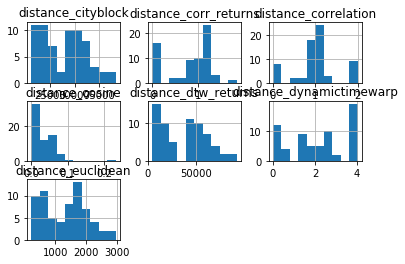

In [15]:

dt2 = calc_distance_table(ds2)
dt2.hist()
dt2


,base,distance_cityblock,distance_corr_returns,distance_correlation,distance_cosine,distance_dtw_returns,distance_dynamictimewarp,distance_euclidean,target
0,gbm11,11125.946853,1.017884,0.993559,0.002956,8466.385068,5.423385,411.275704,gbm12
1,gbm11,85796.752914,0.986212,1.758822,0.111153,84885.958234,9.121676,3853.606356,gbm13
2,gbm11,4472.875794,1.002359,1.032131,0.001228,1100.471135,3.069095,170.833514,gbm21
3,gbm11,4380.254804,1.006980,1.404202,0.001513,2784.955344,2.833992,174.220996,gbm22
4,gbm11,18885.365650,1.022208,1.769574,0.009113,17149.961413,2.944656,765.349210,gbm23
5,gbm12,76566.197487,0.939491,0.608646,0.087814,74365.821055,9.514147,3506.100106,gbm13
6,gbm12,8856.350851,1.017397,0.662396,0.001875,5286.657450,5.177040,326.577700,gbm21
7,gbm12,11516.609162,1.019887,0.726051,0.001963,9074.408491,5.163969,414.489825,gbm22
8,gbm12,11384.143414,1.028872,0.534668,0.004109,8870.887772,5.206962,433.037819,gbm23
9,gbm13,83247.254298,1.017852,0.723529,0.094073,80571.696134,8.174821,3716.756709,gbm21


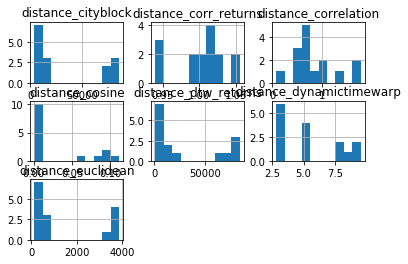

In [16]:

dt3 = calc_distance_table(ds3)
dt3.hist()
dt3


,base,distance_cityblock,distance_corr_returns,distance_correlation,distance_cosine,distance_dtw_returns,distance_dynamictimewarp,distance_euclidean,target
0,gbm11,20356.306516,1.004796,1.738206,0.004462,20356.072205,6.652077,690.051208,gbm12
1,gbm11,11327.192156,0.971266,0.163514,0.005169,10516.901258,6.584705,499.482822,gbm13
2,gbm11,19303.206811,1.000330,1.719527,0.005754,19303.206811,6.399522,674.367476,gbm14
3,gbm11,19984.587530,0.922313,1.960834,0.016380,19984.674578,6.346606,781.043927,gbm15
4,gbm11,13216.984904,0.998991,1.398311,0.003220,12875.414866,6.341463,475.925772,gbm16
...,...,...,...,...,...,...,...,...,...
61,gbm23,44266.859654,1.040151,1.051703,0.038026,40467.053707,8.252136,1830.270735,gbm32
62,gbm23,15760.558280,1.016991,0.539636,0.008161,14335.358074,7.719171,556.871244,gbm33
63,gbm31,22570.822227,1.005203,0.290912,0.019158,10103.555088,10.036277,852.891167,gbm32
64,gbm31,56623.128939,1.021188,1.809463,0.039030,56546.761442,8.952229,2013.488861,gbm33


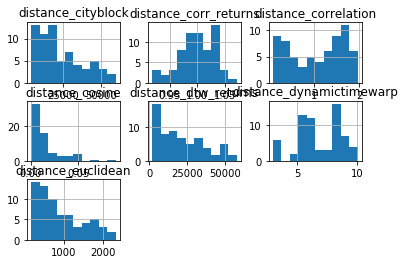

In [17]:

dt4 = calc_distance_table(ds4)
dt4.hist()
dt4

# Linkage

In [18]:
from algorithm.clustering import dendrogram_extra
from scipy.cluster.hierarchy import dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage
from scipy.cluster.hierarchy import linkage as linkage_scipy

Cluster using hierarchical clustering

Cut when k=3

NaN dissimilarity value.
NaN dissimilarity value.


/opt/conda/lib/python3.7/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


<Figure size 576x288 with 0 Axes>

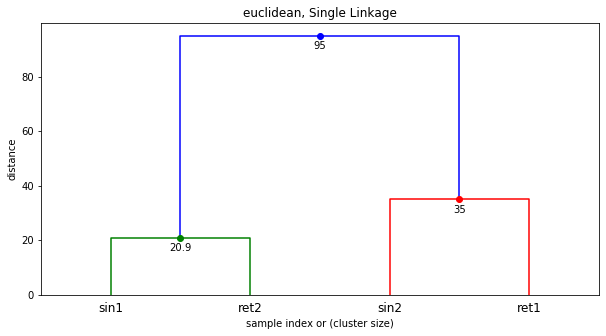

<Figure size 576x288 with 0 Axes>

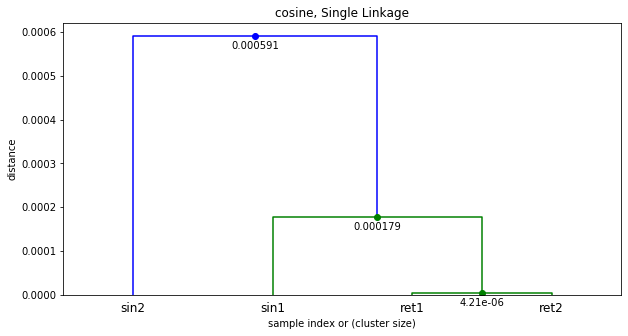

<Figure size 576x288 with 0 Axes>

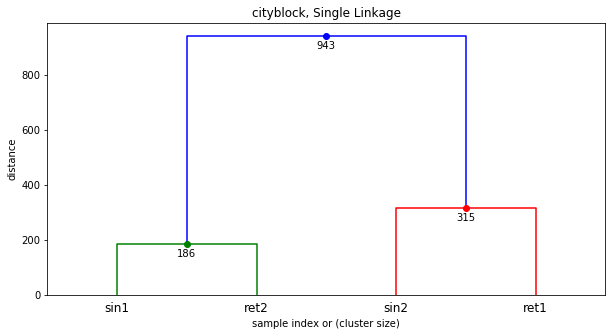

<Figure size 576x288 with 0 Axes>

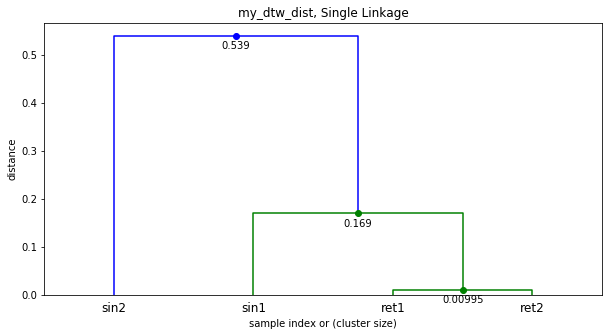

<Figure size 576x288 with 0 Axes>

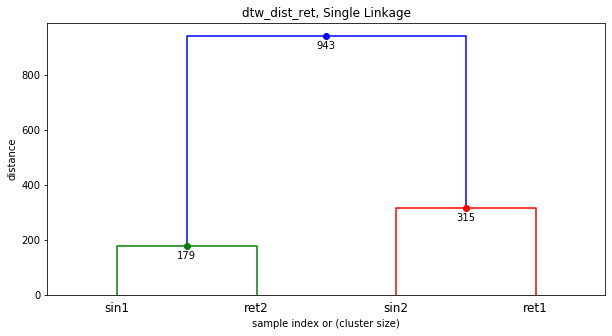

In [19]:
from sklearn import metrics

# 1. get data and distance matrix
def cluster_data(ds, dist_func, k=3):
    labels = list(ds.keys())
    labels.remove('t')
    X = [v for i, v in ds[labels].items()]
    # X  # items to cluster
    # Calculate distance matrix
    dm = pdist(X, dist_func) # Replace distance function here
    # dm
    # pd.DataFrame(squareform(dm)) # need better way to show table
    
    Z = linkage(dm, method='single')
    # Z
    fig = plt.figure(figsize=(8, 4))
    dn = dendrogram_extra(Z, labels=labels)
    plt.title('%s, Single Linkage' % str(dist_func.__name__))
    
    k = k
    c = fcluster(Z, k, criterion='maxclust')
    
    return X, dm, Z, c

def calculate_score(X, c):
    scores = {'calinski_harabasz': metrics.calinski_harabasz_score(X, c),
          'silhouette': metrics.silhouette_score(X, c, metric='euclidean'),
          'davies_bouldin': metrics.davies_bouldin_score(X, c)}
    return scores

# see list of distance function in dictionary above
for dname, f in dfuncs.items():
    try:
        X, dm, Z, c = cluster_data(ds1, f)
    except Exception as e:
        print(e)

Linkage 'Z' contains negative distances.
Linkage 'Z' contains negative distances.


<Figure size 576x288 with 0 Axes>

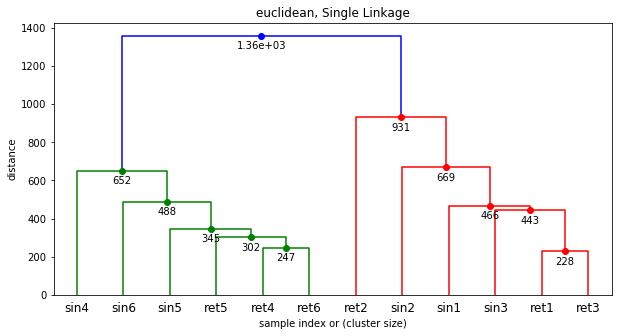

<Figure size 576x288 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 576x288 with 0 Axes>

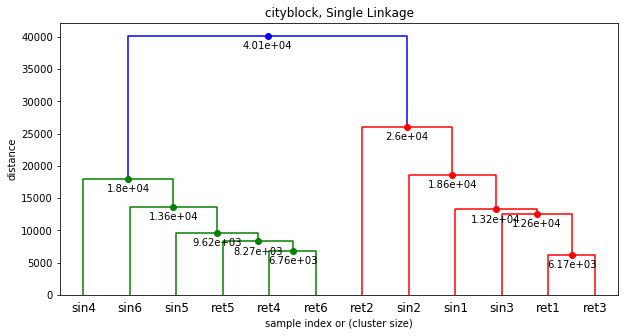

<Figure size 576x288 with 0 Axes>

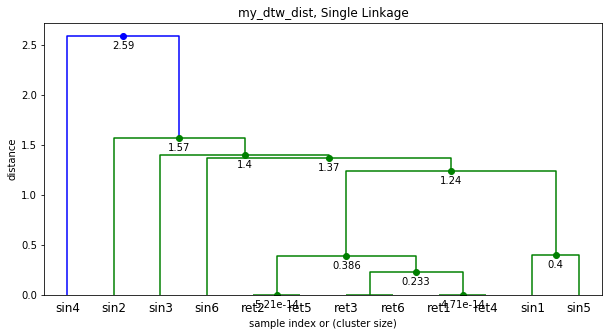

<Figure size 576x288 with 0 Axes>

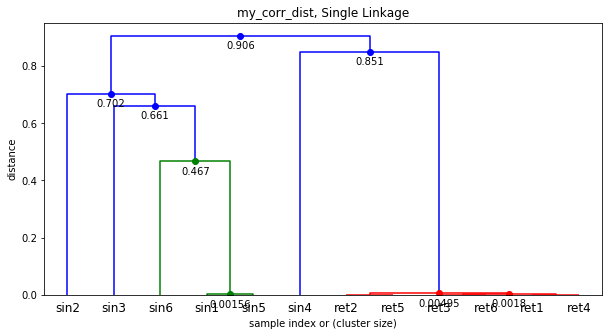

<Figure size 576x288 with 0 Axes>

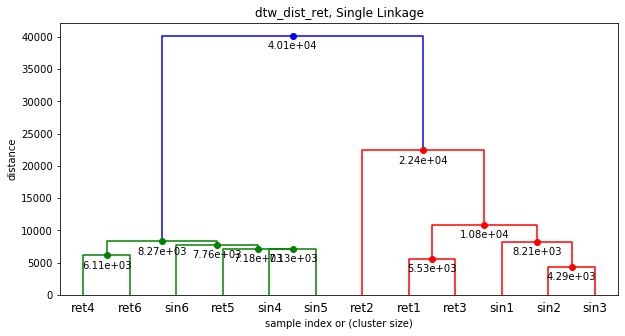

In [20]:
# Data set 2
for dname, f in dfuncs.items():
    try:
        X, dm, Z, c = cluster_data(ds2, f)
    except Exception as e:
        print(e)

<Figure size 576x288 with 0 Axes>

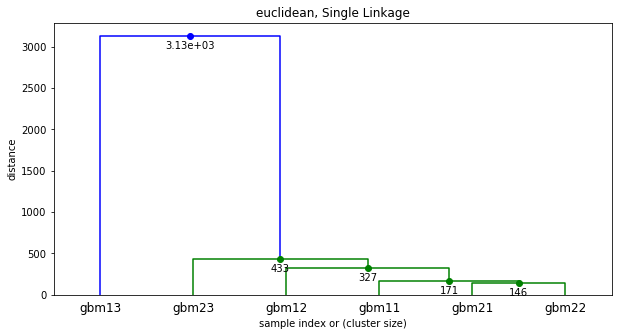

<Figure size 576x288 with 0 Axes>

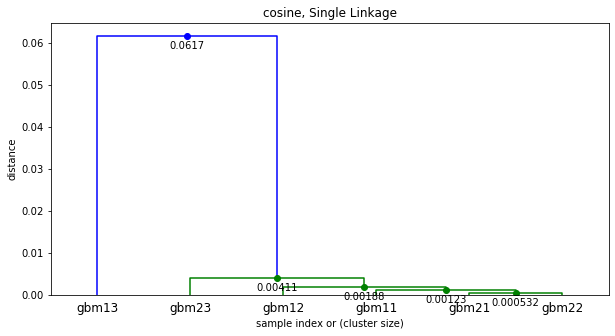

<Figure size 576x288 with 0 Axes>

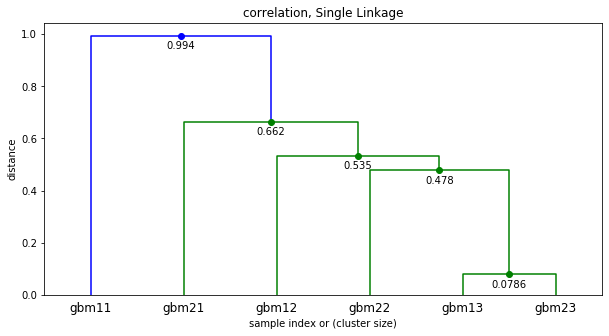

<Figure size 576x288 with 0 Axes>

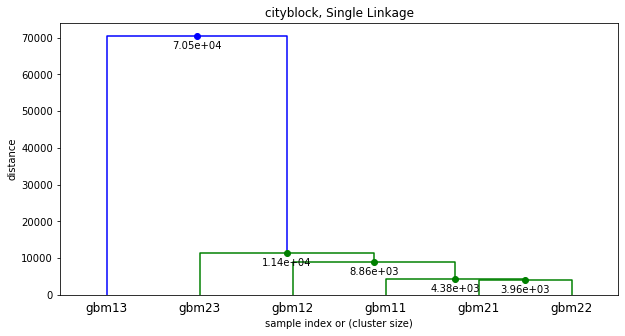

<Figure size 576x288 with 0 Axes>

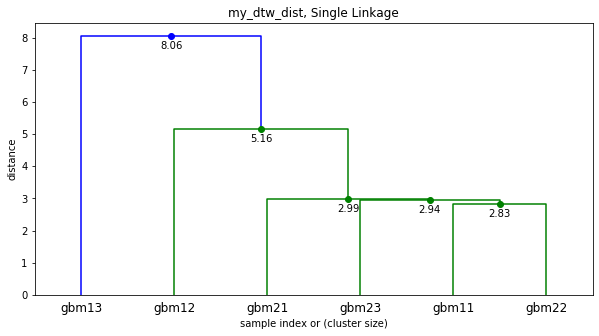

<Figure size 576x288 with 0 Axes>

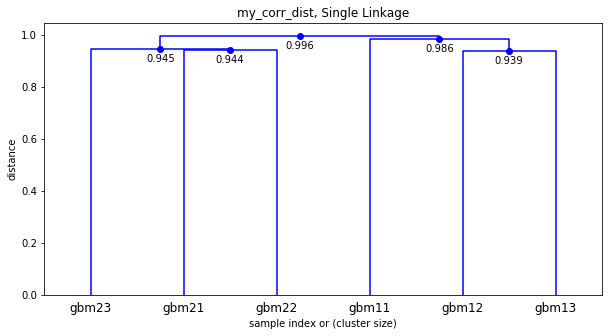

<Figure size 576x288 with 0 Axes>

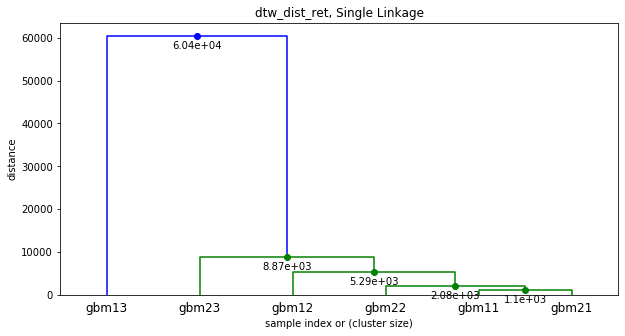

In [21]:
# Data set 3
for dname, f in dfuncs.items():
    try:
        X, dm, Z, c = cluster_data(ds3, f)
    except Exception as e:
        print(e)

<Figure size 576x288 with 0 Axes>

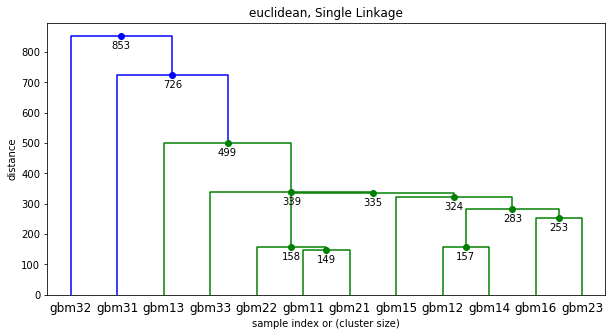

<Figure size 576x288 with 0 Axes>

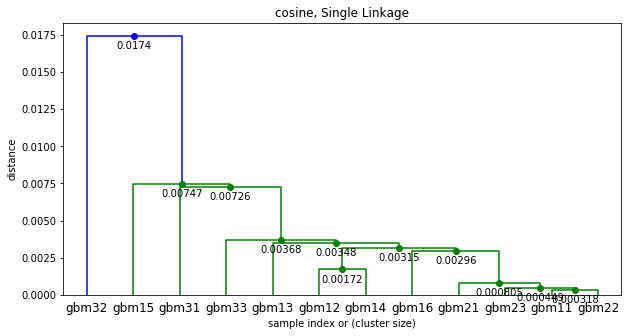

<Figure size 576x288 with 0 Axes>

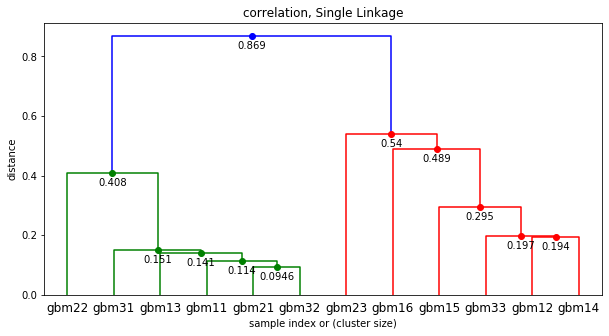

<Figure size 576x288 with 0 Axes>

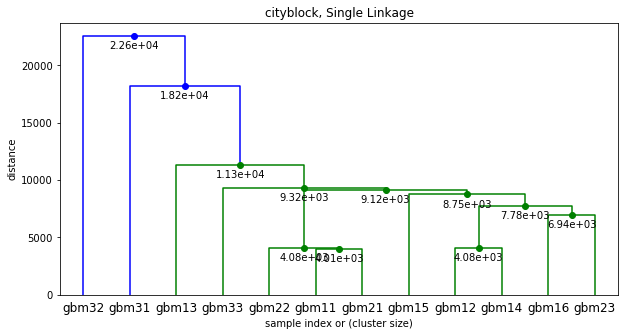

<Figure size 576x288 with 0 Axes>

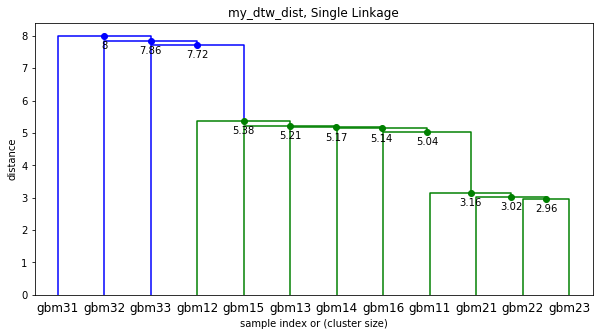

<Figure size 576x288 with 0 Axes>

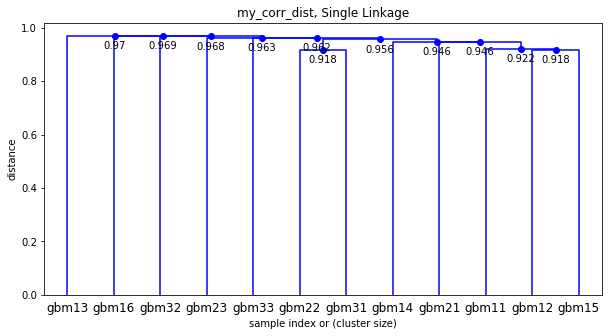

<Figure size 576x288 with 0 Axes>

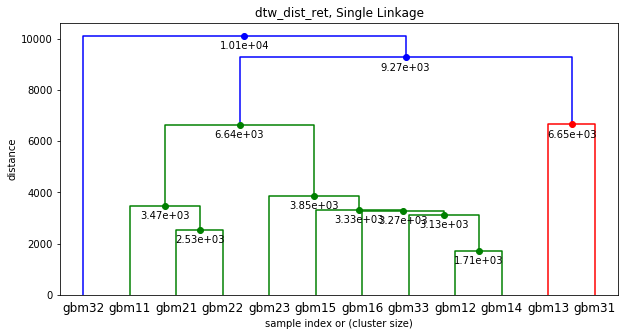

In [22]:



# Data set 4
for dname, f in dfuncs.items():
    try:
        X, dm, Z, c = cluster_data(ds4, f)
    except Exception as e:
        print(e)

# Visualize Output Result

<Figure size 576x288 with 0 Axes>

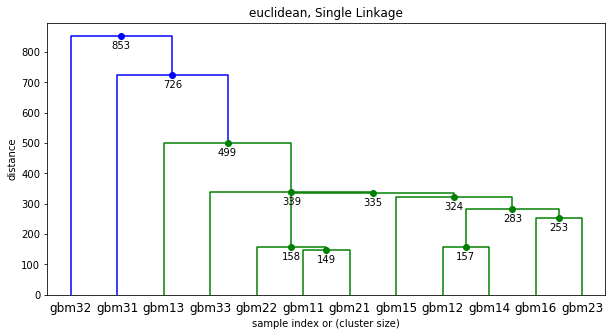

In [23]:
X, dm, Z, clusters = cluster_data(ds4, euclidean)

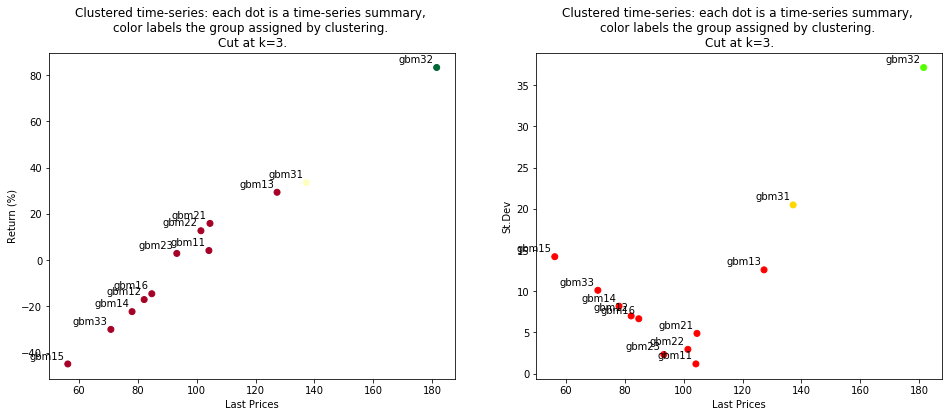

In [24]:
def plot_results(ds, X, clusters): 
    # plot with first value and last value 
    labels = list(ds.keys())
    labels.remove('t')
    
    # obtain K from cluster 
    k = np.unique(clusters).size

    # X[0] # this is pd.Series object
    firsts = np.array(list(map(lambda ts: ts.values[0], X)))  # Standard deviation is X-axis
    lasts = np.array(list(map(lambda ts: ts.values[-1], X))) # Mean is Y-axis

    returns = (lasts - firsts) / firsts * 100 # Returns in pct

    plt.figure(figsize=(16, 6))
    # Plot 1
    plt.subplot(1,2,1)
    plt.scatter(lasts, returns, c=clusters, cmap='RdYlGn')  # plot points with cluster dependent colors
    plt.title("Clustered time-series: each dot is a time-series summary, \ncolor labels the group assigned by clustering. \nCut at k=%s." % k)
    plt.xlabel("Last Prices")
    plt.ylabel("Return (%)")

    # Add label:
    for label, x, y in zip(labels, lasts, returns):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-3, 3),
            textcoords='offset points', ha='right', va='bottom')
    
    # Plot 2
    plt.subplot(1,2,2)
    st_devs = list(map(np.std, X))  # Standard deviation is X-axis
    means = list(map(lambda ts: np.mean(ts), X)) # Mean is Y-axis
    plt.scatter(lasts, st_devs, c=clusters, cmap='prism')  # plot points with cluster dependent colors
    plt.title("Clustered time-series: each dot is a time-series summary, \ncolor labels the group assigned by clustering. \nCut at k=%s." % k)
    plt.xlabel("Last Prices")
    plt.ylabel("St.Dev")

    # Add label:
    for label, x, y in zip(labels, lasts, st_devs):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-3, 3),
            textcoords='offset points', ha='right', va='bottom')
    
plot_results(ds4, X, clusters)

<Figure size 576x288 with 0 Axes>

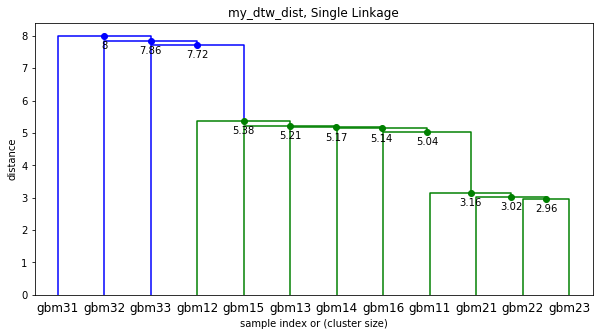

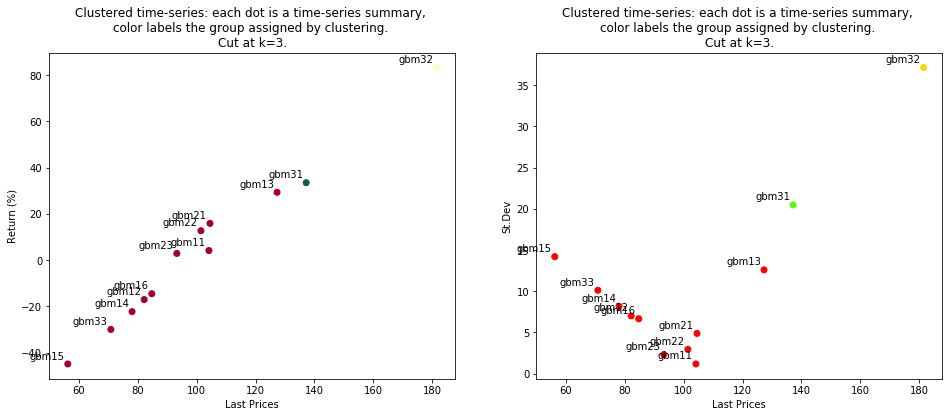

In [25]:
X, dm, Z, clusters = cluster_data(ds4, my_dtw_dist)
plot_results(ds4, X, clusters)

<Figure size 576x288 with 0 Axes>

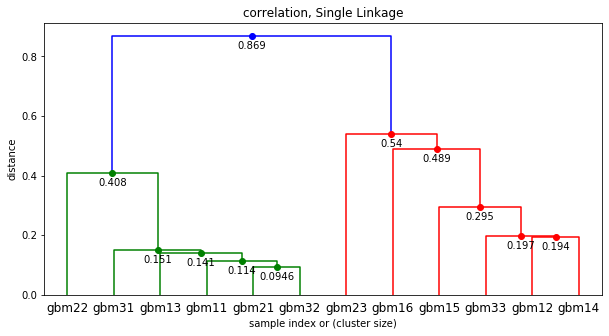

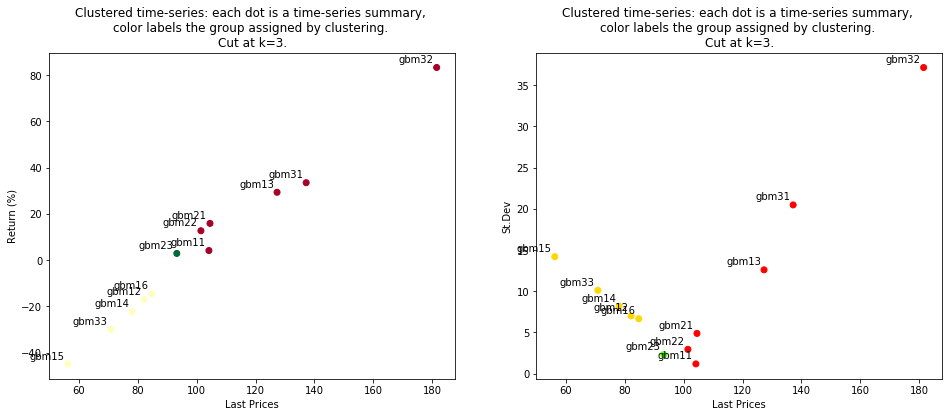

In [26]:
X, dm, Z, clusters = cluster_data(ds4, correlation)
plot_results(ds4, X, clusters)

<Figure size 576x288 with 0 Axes>

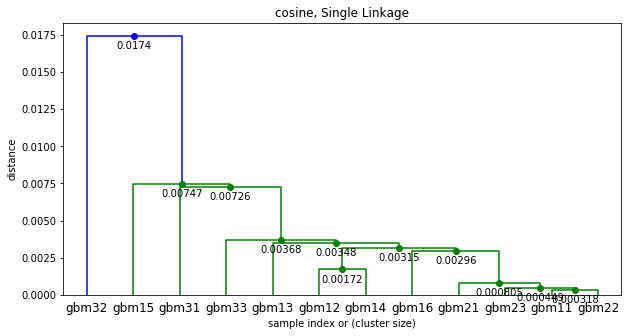

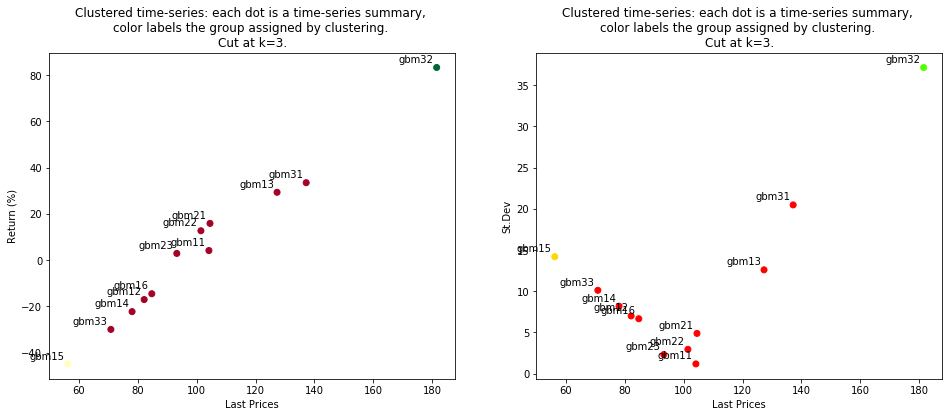

In [27]:
X, dm, Z, clusters = cluster_data(ds4, cosine)
plot_results(ds4, X, clusters)

# Result Data Set 1

Text(0.5, 1.0, 'Data Set 1')

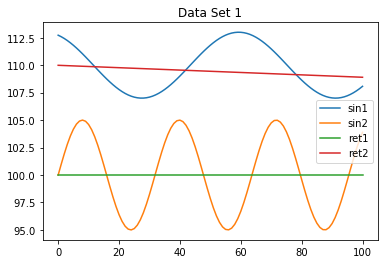

In [28]:
# ds1

labels = list(ds1.keys())
labels.remove('t')

for l in labels:
    ts = ds1[l]
    plt.plot(ts, label=l)
plt.legend()
plt.title("Data Set 1")

In [29]:
dt1 = calc_distance_table(ds1)
dt1

,base,distance_cityblock,distance_corr_returns,distance_correlation,distance_cosine,distance_dtw_returns,distance_dynamictimewarp,distance_euclidean,target
0,sin1,963.177640,0.803819,0.779771,0.000642,963.177640,0.539374,102.629101,sin2
1,sin1,974.469567,NaN,NaN,0.000185,974.469567,0.171166,99.247848,ret1
2,sin1,186.013093,1.128029,0.818311,0.000179,178.535584,0.169481,20.930049,ret2
3,sin2,315.378728,NaN,NaN,0.000605,315.378728,0.637599,35.028133,ret1
4,sin2,942.608073,1.092646,0.818660,0.000591,942.608073,0.638054,99.962495,ret2
5,ret1,953.900000,NaN,NaN,0.000004,953.900000,0.009951,94.970225,ret2


,score
calinski_harabasz,22.659961
davies_bouldin,0.288086
silhouette,0.717849


<Figure size 576x288 with 0 Axes>

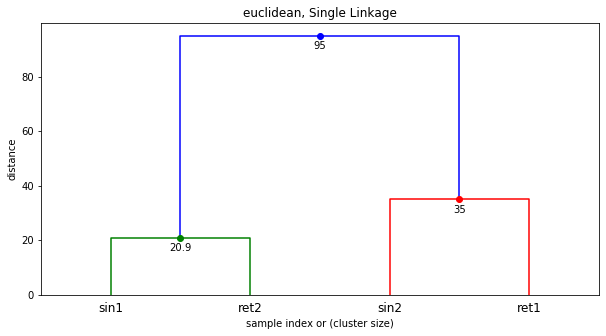

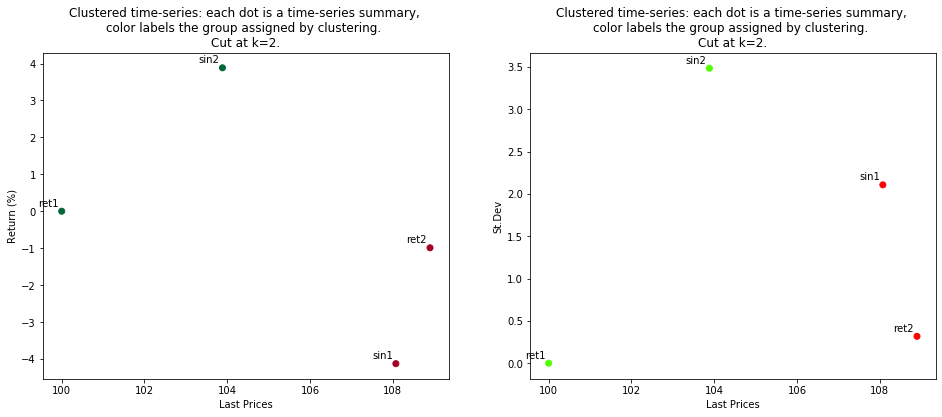

In [30]:
X, dm, Z, clusters = cluster_data(ds1, euclidean)
plot_results(ds1, X, clusters)

score = calculate_score(X, clusters)
pd.DataFrame(data={'score':score})

,score
calinski_harabasz,1.189925
davies_bouldin,0.615556
silhouette,0.048874


<Figure size 576x288 with 0 Axes>

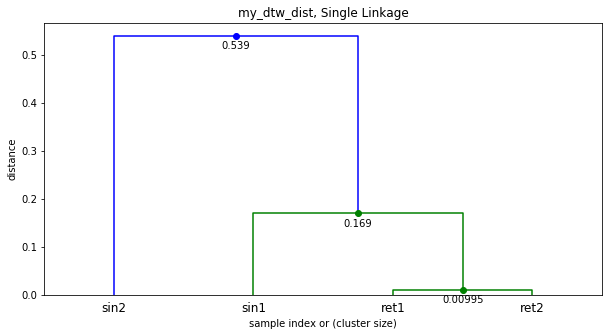

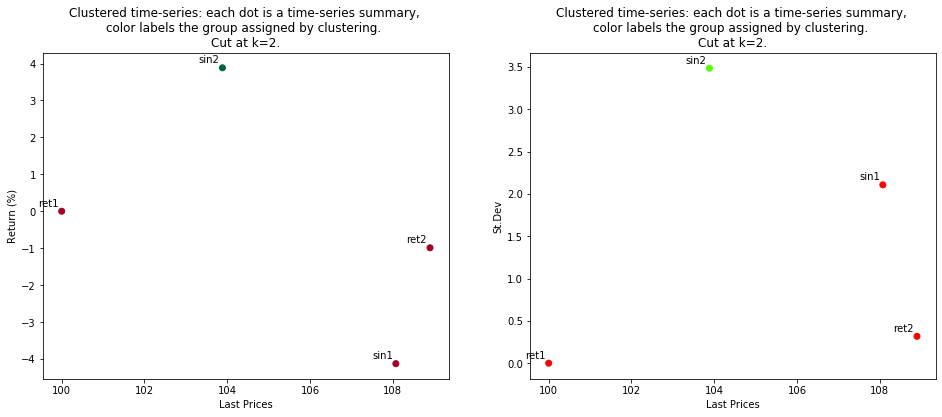

In [31]:
X, dm, Z, clusters = cluster_data(ds1, my_dtw_dist)
plot_results(ds1, X, clusters)

score = calculate_score(X, clusters)
pd.DataFrame(data={'score':score})

# Result Data Set 2

Text(0.5, 1.0, 'Data Set 2')

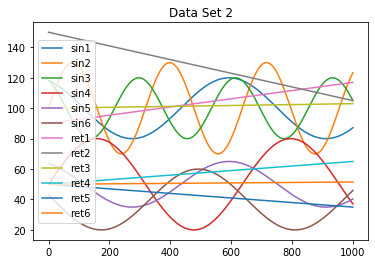

In [32]:
# ds2

labels = list(ds2.keys())
labels.remove('t')

for l in labels:
    ts = ds2[l]
    plt.plot(ts, label=l)
plt.legend()
plt.title("Data Set 2")

In [33]:
dt2 = calc_distance_table(ds2)
dt2

,base,distance_cityblock,distance_corr_returns,distance_correlation,distance_cosine,distance_dtw_returns,distance_dynamictimewarp,distance_euclidean,target
0,sin1,18563.113970,0.739622,7.736260e-01,0.024377,10208.758417,2.952521,715.101210,sin2
1,sin1,17345.732645,1.092716,1.090165e+00,0.021501,8214.501932,1.702117,663.111359,sin3
2,sin1,41878.328925,1.454294,1.360074e+00,0.085338,41878.328925,3.004793,1596.784482,sin4
3,sin1,49451.324362,0.001558,-2.220446e-16,0.002599,49451.324362,0.399955,1566.937139,sin5
4,sin1,61600.982223,0.467104,5.013074e-01,0.046471,61600.982223,2.114641,1994.505552,sin6
...,...,...,...,...,...,...,...,...,...
61,ret3,59068.000000,0.004946,2.000000e+00,0.006053,59068.000000,0.385904,1874.185171,ret5
62,ret3,50801.500000,0.000000,0.000000e+00,0.000000,50801.500000,0.000000,1605.740289,ret6
63,ret4,15030.000000,0.012623,2.000000e+00,0.015572,15030.000000,0.618440,548.406920,ret5
64,ret4,6763.500000,0.001800,0.000000e+00,0.002218,6106.414585,0.232536,246.783114,ret6


,score
calinski_harabasz,26.221923
davies_bouldin,0.421460
silhouette,0.509275


<Figure size 576x288 with 0 Axes>

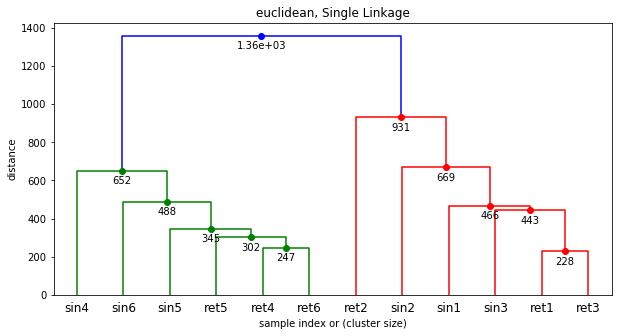

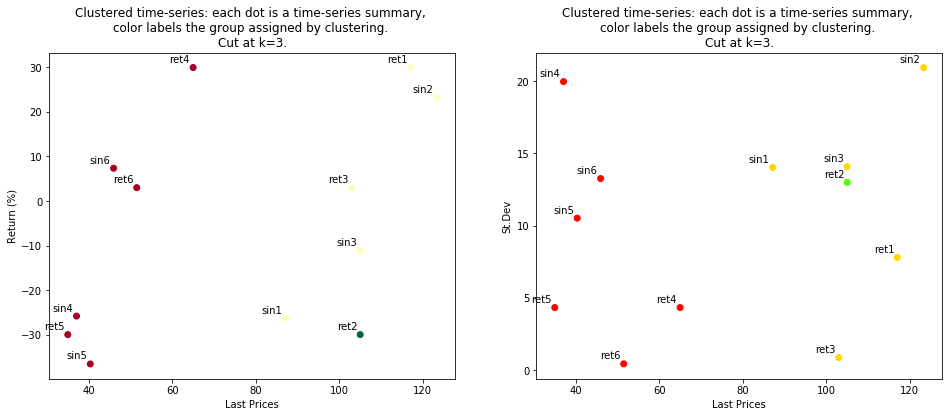

In [34]:
X, dm, Z, clusters = cluster_data(ds2, euclidean)
plot_results(ds2, X, clusters)

score = calculate_score(X, clusters)
pd.DataFrame(data={'score':score})

,score
calinski_harabasz,0.809229
davies_bouldin,0.995196
silhouette,-0.312304


<Figure size 576x288 with 0 Axes>

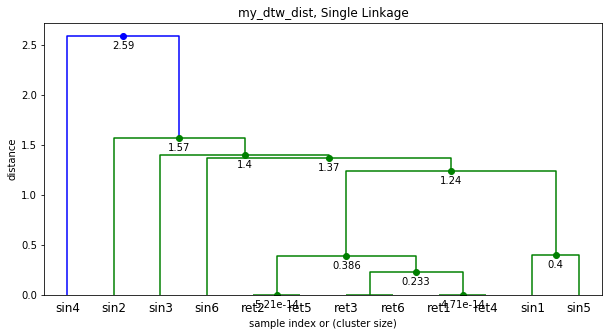

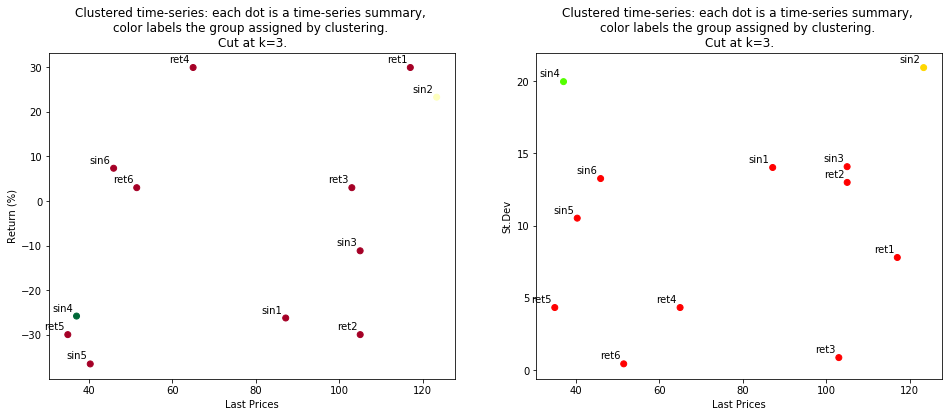

In [35]:
X, dm, Z, clusters = cluster_data(ds2, my_dtw_dist)
plot_results(ds2, X, clusters)

score = calculate_score(X, clusters)
pd.DataFrame(data={'score':score})

,score
calinski_harabasz,37.643354
davies_bouldin,0.464189
silhouette,0.643435


<Figure size 576x288 with 0 Axes>

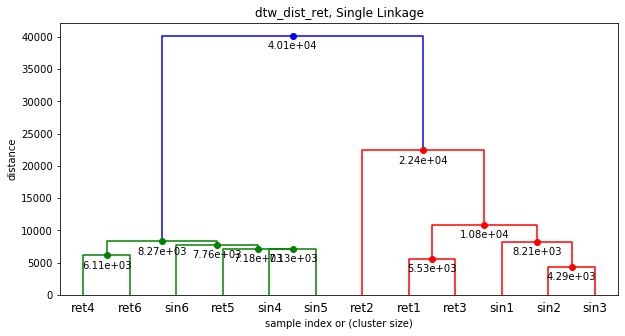

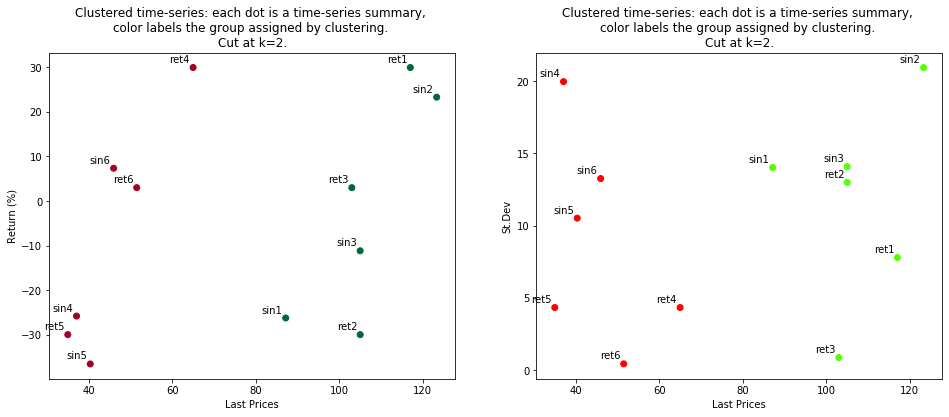

In [36]:
X, dm, Z, clusters = cluster_data(ds2, dtw_dist_ret, k=2)
plot_results(ds2, X, clusters)

score = calculate_score(X, clusters)
pd.DataFrame(data={'score':score})

In [37]:
dt2 = calc_distance_table(ds2)
dt2

,base,distance_cityblock,distance_corr_returns,distance_correlation,distance_cosine,distance_dtw_returns,distance_dynamictimewarp,distance_euclidean,target
0,sin1,18563.113970,0.739622,7.736260e-01,0.024377,10208.758417,2.952521,715.101210,sin2
1,sin1,17345.732645,1.092716,1.090165e+00,0.021501,8214.501932,1.702117,663.111359,sin3
2,sin1,41878.328925,1.454294,1.360074e+00,0.085338,41878.328925,3.004793,1596.784482,sin4
3,sin1,49451.324362,0.001558,-2.220446e-16,0.002599,49451.324362,0.399955,1566.937139,sin5
4,sin1,61600.982223,0.467104,5.013074e-01,0.046471,61600.982223,2.114641,1994.505552,sin6
...,...,...,...,...,...,...,...,...,...
61,ret3,59068.000000,0.004946,2.000000e+00,0.006053,59068.000000,0.385904,1874.185171,ret5
62,ret3,50801.500000,0.000000,0.000000e+00,0.000000,50801.500000,0.000000,1605.740289,ret6
63,ret4,15030.000000,0.012623,2.000000e+00,0.015572,15030.000000,0.618440,548.406920,ret5
64,ret4,6763.500000,0.001800,0.000000e+00,0.002218,6106.414585,0.232536,246.783114,ret6


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


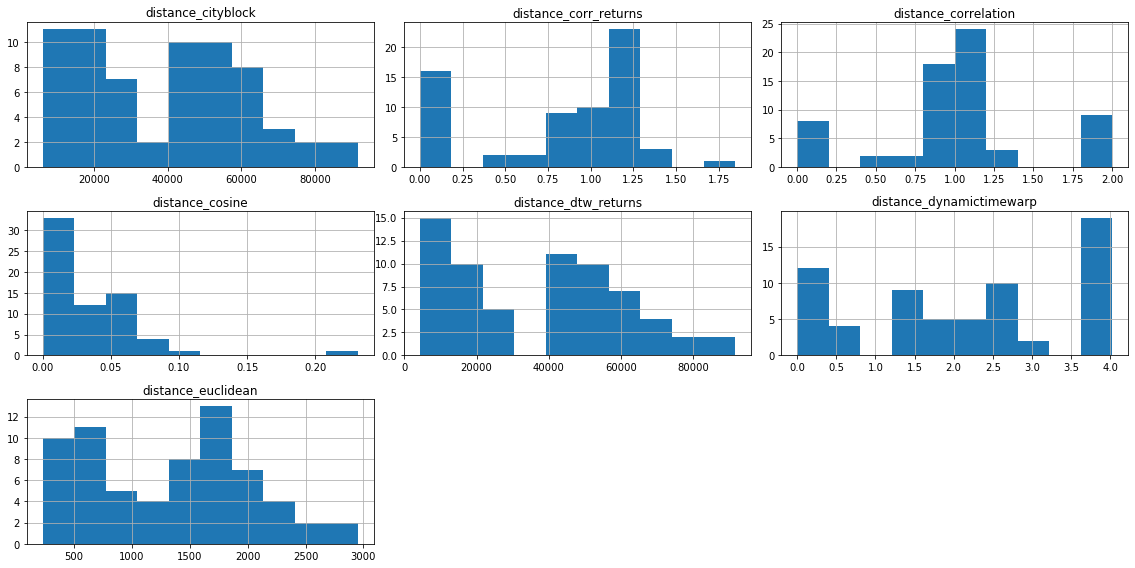

In [38]:
# Show histogram of distances calculated
plt.figure(figsize=(16,8))
dt2.hist(ax=plt.gca())
plt.tight_layout() 

# Data Set 3

In [39]:
# ds3
labels = list(ds3.keys())
labels.remove('t')
for l in labels:
    ts = ds3[l]
    plt.plot(ts, label=l)
plt.legend()
plt.title("Data Set 3")

NameError: name 'dt2ot' is not defined

In [ ]:
dt3 = calc_distance_table(ds3)
dt3

In [ ]:
X, dm, Z, clusters = cluster_data(ds3, euclidean)
plot_results(ds3, X, clusters)

score = calculate_score(X, clusters)
pd.DataFrame(data={'score':score})

In [ ]:
X, dm, Z, clusters = cluster_data(ds3, my_dtw_dist)
plot_results(ds3, X, clusters)

score = calculate_score(X, clusters)
pd.DataFrame(data={'score':score})

In [ ]:
X, dm, Z, clusters = cluster_data(ds3, dtw_dist_ret)
plot_results(ds3, X, clusters)

score = calculate_score(X, clusters)
pd.DataFrame(data={'score':score})

In [ ]:
# Show histogram of distances calculated
plt.figure(figsize=(16,8))
dt3.hist(ax=plt.gca())
plt.tight_layout() 

### On Data Set 2

index score for Euclidean and DTW of time-series log return are similar. Calculate DTW distance directly between two time series produce negative Silhouette score.

# Data Set 4

In [ ]:
# ds4
labels = list(ds4.keys())
labels.remove('t')

for l in labels:
    ts = ds4[l]
    plt.plot(ts, label=l)
plt.legend()
plt.title("Data Set 4")

In [ ]:
dt4 = calc_distance_table(ds4)
dt4

In [ ]:
df_score = pd.DataFrame()

flist = [euclidean, dtw_dist_ret, correlation]
K = [2,3,4]
for f in flist:
    for k in K:
        X, dm, Z, clusters = cluster_data(ds4, f, k=k)
        plot_results(ds4, X, clusters)
        score = calculate_score(X, clusters)
        data={"%s-k=%s"%(f.__name__,k):score}
        df_score = pd.DataFrame(data)
        print(df_score)
        #df_score = df_score.append(data,ignore_index=True)